In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score, precision_score, recall_score

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)



iris = load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['Type'])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


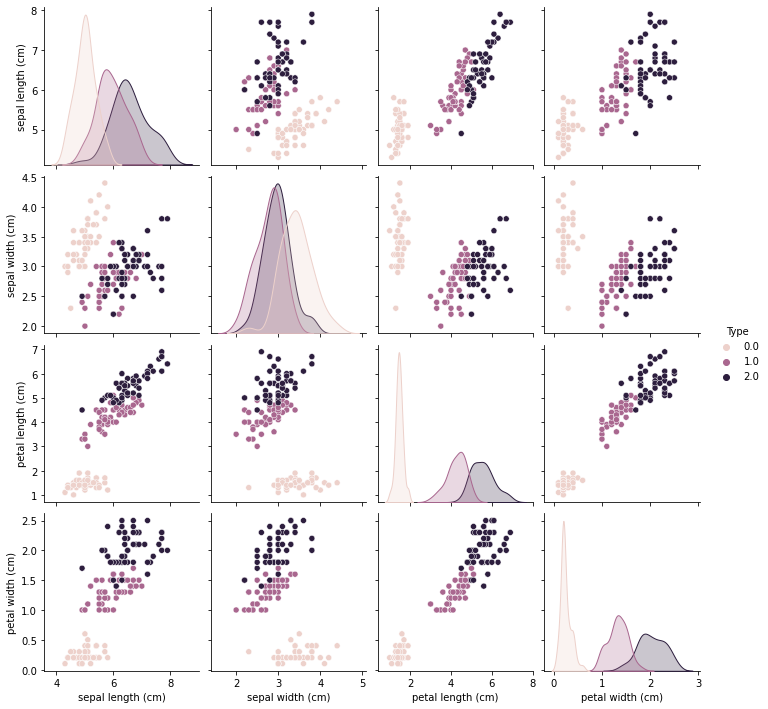

In [2]:
sns.pairplot(df, hue='Type')

In [3]:
#X_train,X_test,y_train,y_test=train_test_split(df,test_size=0.33,random_state=0)

In [4]:
clf = KNeighborsClassifier()
KNeighborsClassifier

sklearn.neighbors._classification.KNeighborsClassifier

In [5]:
clf.__dict__

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform'}

In [6]:
k_parameter = {'n_neighbors':range(5,20)}
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], test_size=0.33, random_state=42)

knn_clf = GridSearchCV(clf, param_grid = k_parameter, cv=5)
knn_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 20)})

In [7]:
knn_clf.cv_results_

{'mean_fit_time': array([0.01268368, 0.00058694, 0.00058594, 0.00039024, 0.00058603,
        0.00039377, 0.0005785 , 0.00019493, 0.0007822 , 0.00039043,
        0.00039058, 0.00039039, 0.00059414, 0.00019507, 0.00038886]),
 'std_fit_time': array([0.02488242, 0.00047923, 0.00047842, 0.00047795, 0.00047849,
        0.00048244, 0.0004725 , 0.00038986, 0.00039111, 0.00047818,
        0.00047836, 0.00047812, 0.00048539, 0.00039015, 0.00047626]),
 'mean_score_time': array([0.00156674, 0.00116487, 0.00117106, 0.0011724 , 0.00117354,
        0.00097079, 0.00118666, 0.00116229, 0.00117006, 0.0009757 ,
        0.00136671, 0.00097594, 0.0009747 , 0.00116596, 0.0011765 ]),
 'std_score_time': array([1.16872778e-03, 7.30452700e-04, 3.90912178e-04, 3.91675116e-04,
        3.94559465e-04, 1.23843708e-05, 4.04188322e-04, 3.71694641e-04,
        3.87835895e-04, 5.35248383e-07, 9.95855718e-04, 5.95569420e-07,
        4.46397008e-06, 3.94118895e-04, 3.85733398e-04]),
 'param_n_neighbors': masked_array(dat

In [8]:
best_knn_clf =  knn_clf.best_estimator_

## Lets see the preformance of the test. 

In [9]:
precision_score(best_knn_clf.predict(X_train), y_train, average='micro')

0.97

In [10]:
recall_score(best_knn_clf.predict(X_train), y_train, average='micro')

0.97

In [11]:
best_knn_clf.score(X_test, y_test)

0.98

In [12]:
y_pred = best_knn_clf.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [13]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [14]:
precision_score(y_test, y_pred, average='micro')

0.98

In [15]:
recall_score(y_test, y_pred, average='micro')

0.98

# Test gives outstanding results :)
The guess was right. It seems there exists a hyper plane that can split the data. 

K means gaussian might have worked even better with known 3 centroids or logistic. 